In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
df = pd.read_csv("craigslist_vehicles.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    426880 non-null  int64  
 1   id            426880 non-null  int64  
 2   url           426880 non-null  object 
 3   region        426880 non-null  object 
 4   region_url    426880 non-null  object 
 5   price         426880 non-null  int64  
 6   year          425675 non-null  float64
 7   manufacturer  409234 non-null  object 
 8   model         421603 non-null  object 
 9   condition     252776 non-null  object 
 10  cylinders     249202 non-null  object 
 11  fuel          423867 non-null  object 
 12  odometer      422480 non-null  float64
 13  title_status  418638 non-null  object 
 14  transmission  424324 non-null  object 
 15  VIN           265838 non-null  object 
 16  drive         296313 non-null  object 
 17  size          120519 non-null  object 
 18  type

In [4]:
#see if there are missing values
df.isna().sum()

Unnamed: 0           0
id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
removal_date        68
dtype: int64

In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'county', 'state', 'lat',
       'long', 'posting_date', 'removal_date'],
      dtype='object')

In [6]:
# Get the data types of each column
data_types = df.dtypes

#grouping columns by dtype
categorical_columns = data_types[data_types == 'object']
numeric_columns = data_types[data_types != 'object']

In [7]:
categorical_columns

url             object
region          object
region_url      object
manufacturer    object
model           object
condition       object
cylinders       object
fuel            object
title_status    object
transmission    object
VIN             object
drive           object
size            object
type            object
paint_color     object
image_url       object
description     object
state           object
posting_date    object
removal_date    object
dtype: object

In [8]:
numeric_columns

Unnamed: 0      int64
id              int64
price           int64
year          float64
odometer      float64
county        float64
lat           float64
long          float64
dtype: object

In [9]:
# filling the empty columns

# Fill numerical columns with median
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Fill categorical columns with mode
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [10]:
df.isna().sum()

Unnamed: 0           0
id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer         0
model                0
condition            0
cylinders            0
fuel                 0
odometer             0
title_status         0
transmission         0
VIN                  0
drive                0
size                 0
type                 0
paint_color          0
image_url            0
description          0
county          426880
state                0
lat                  0
long                 0
posting_date         0
removal_date         0
dtype: int64

In [11]:
# Converting 'posting_date' column to datetime data type

df['posting_date'] = pd.to_datetime(df['posting_date'])

In [12]:
# Set 'posting_date' as the index

df.set_index('posting_date', inplace=True)

In [13]:
df.head(10)

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,size,type,paint_color,image_url,description,county,state,lat,long,removal_date
posting_date,,,,,,,,,,,,,,,,,,,,,
2021-04-16 00:00:00+00:00,362773,7307679724,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,good,...,full-size,sedan,white,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-05-02 00:00:00+00:00
2021-04-24 00:00:00+00:00,362712,7311833696,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,good,...,full-size,sedan,white,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-28 00:00:00+00:00
2021-04-23 00:00:00+00:00,362722,7311441996,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4900,2006.0,toyota,camry,excellent,...,full-size,sedan,silver,https://images.craigslist.org/00808_5FkOw2aGjA...,2006 TOYOTA CAMRY LE Sedan Ready To Upgrade ...,NaN,tx,32.453848,-99.787900,2021-05-25 00:00:00+00:00
2021-04-16 00:00:00+00:00,362771,7307680715,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,good,...,full-size,sedan,white,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-26 00:00:00+00:00
2021-04-24 00:00:00+00:00,362710,7311834578,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,good,...,full-size,sedan,white,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-05-12 00:00:00+00:00
2021-04-16 00:00:00+00:00,362772,7307680254,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,honda,odyssey,good,...,full-size,sedan,white,https://images.craigslist.org/01616_fGayd5FvZb...,$6500.00 Cash 2008 Honda Odyssey 6 cylinder ...,NaN,tx,32.401556,-99.884713,2021-04-27 00:00:00+00:00
2021-04-24 00:00:00+00:00,362711,7311834077,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,honda,odyssey,good,...,full-size,sedan,white,https://images.craigslist.org/01616_fGayd5FvZb...,$6500.00 Cash 2008 Honda Odyssey 6 cylinder ...,NaN,tx,32.401556,-99.884713,2021-05-09 00:00:00+00:00
2021-04-23 00:00:00+00:00,362723,7311441803,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,11500,2014.0,honda,cr-v,excellent,...,full-size,SUV,white,https://images.craigslist.org/00N0N_4rGuHY0K9w...,2014 HONDA CR-V LX SUV Ready To Upgrade Your...,NaN,tx,32.453848,-99.787900,2021-04-30 00:00:00+00:00
2021-04-18 00:00:00+00:00,362763,7308988448,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,11125,2014.0,toyota,camry,good,...,full-size,sedan,grey,https://images.craigslist.org/00Y0Y_lzoRI0OvfB...,2014 Grey Toyota Camry LE 4 dr with very clean...,NaN,tx,32.339483,-99.669829,2021-05-11 00:00:00+00:00


## Exploratory Data Analysis

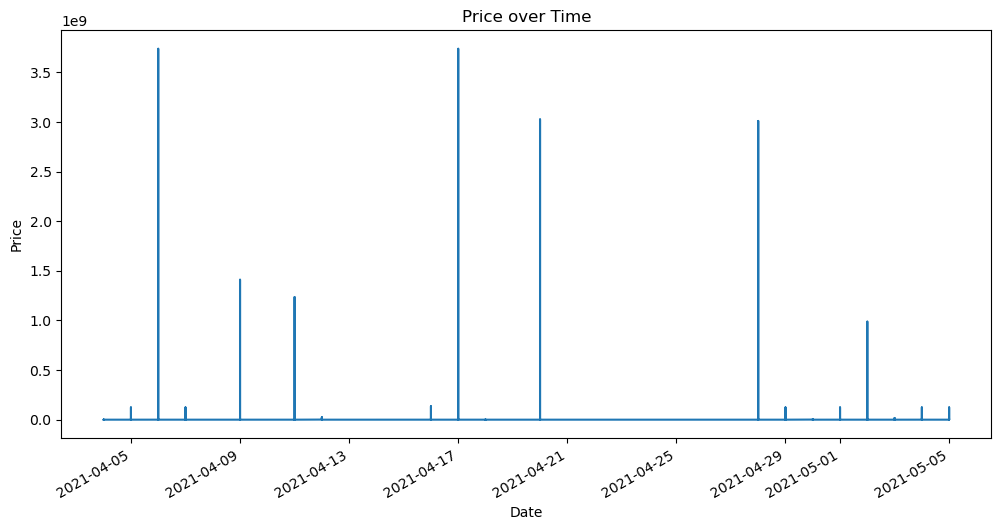

In [14]:
# Line plot of price over time
plt.figure(figsize=(12, 6))
df['price'].plot()
plt.title('Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

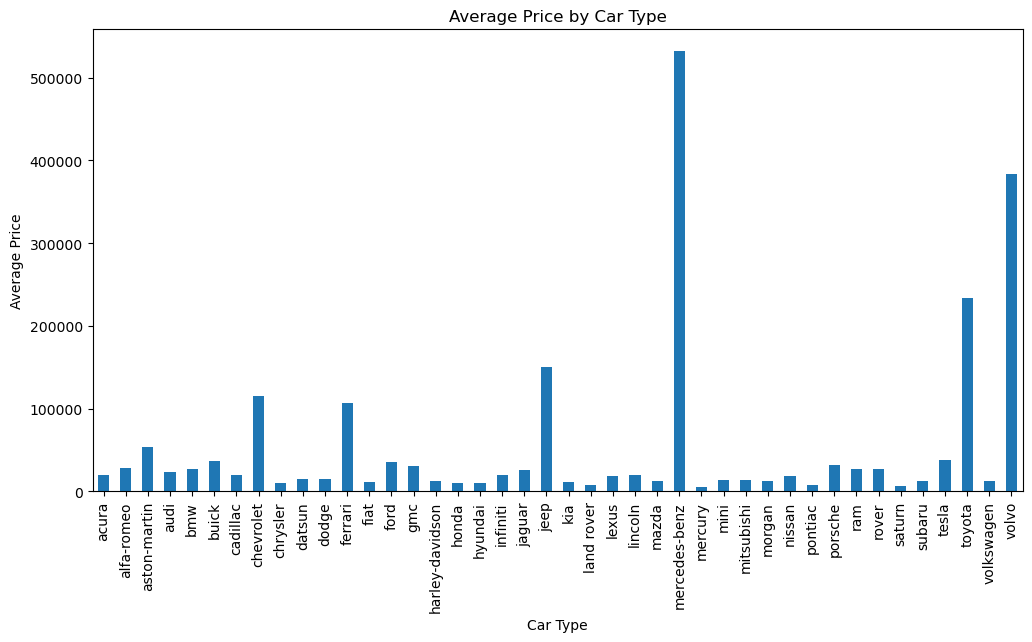

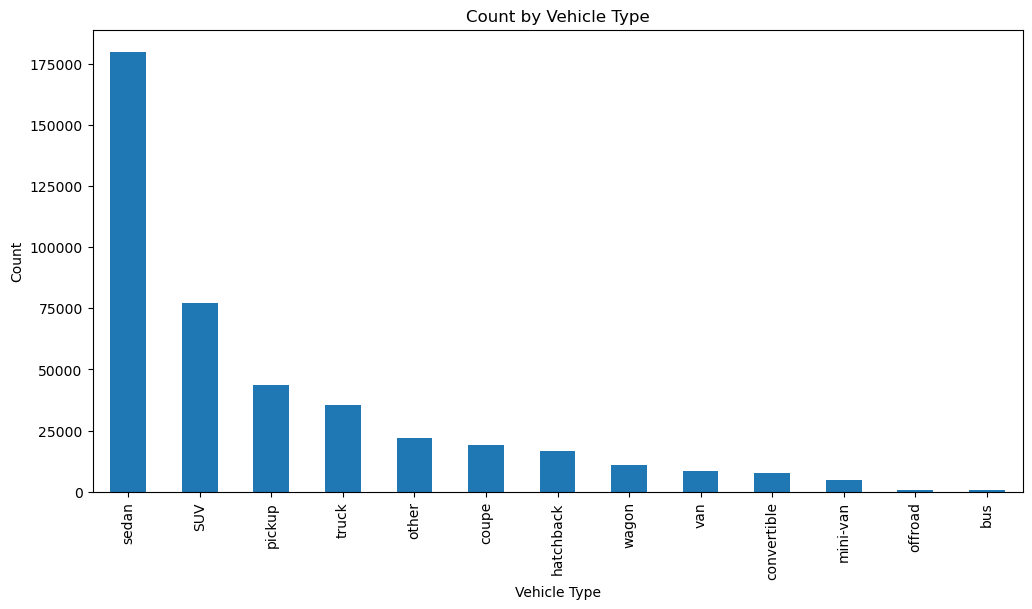

In [19]:
# Analyzing demand-supply dynamics by region and vehicle type using bar plots

# Bar plot of average price by Car Type
plt.figure(figsize=(12, 6))
df.groupby('manufacturer')['price'].mean().plot(kind='bar')
plt.title('Average Price by Car Type')
plt.xlabel('Car Type')
plt.ylabel('Average Price')
plt.show()

# Bar plot of count by vehicle type
plt.figure(figsize=(12, 6))
df['type'].value_counts().plot(kind='bar')
plt.title('Count by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()


In [20]:
# Performing statistical analysis using descriptive statistics

# Summary statistics of numerical columns
summary_stats = df[['price', 'year', 'odometer']].describe()
print(summary_stats)

# Correlation matrix of numerical columns
correlation_matrix = df[['price', 'year', 'odometer']].corr()
print(correlation_matrix)

              price           year      odometer
count  4.268800e+05  426880.000000  4.268800e+05
mean   7.519903e+04    2011.240173  9.791454e+04
std    1.218228e+07       9.439234  2.127801e+05
min    0.000000e+00    1900.000000  0.000000e+00
25%    5.900000e+03    2008.000000  3.813000e+04
50%    1.395000e+04    2013.000000  8.554800e+04
75%    2.648575e+04    2017.000000  1.330000e+05
max    3.736929e+09    2022.000000  1.000000e+07
             price      year  odometer
price     1.000000 -0.004926  0.010035
year     -0.004926  1.000000 -0.156774
odometer  0.010035 -0.156774  1.000000


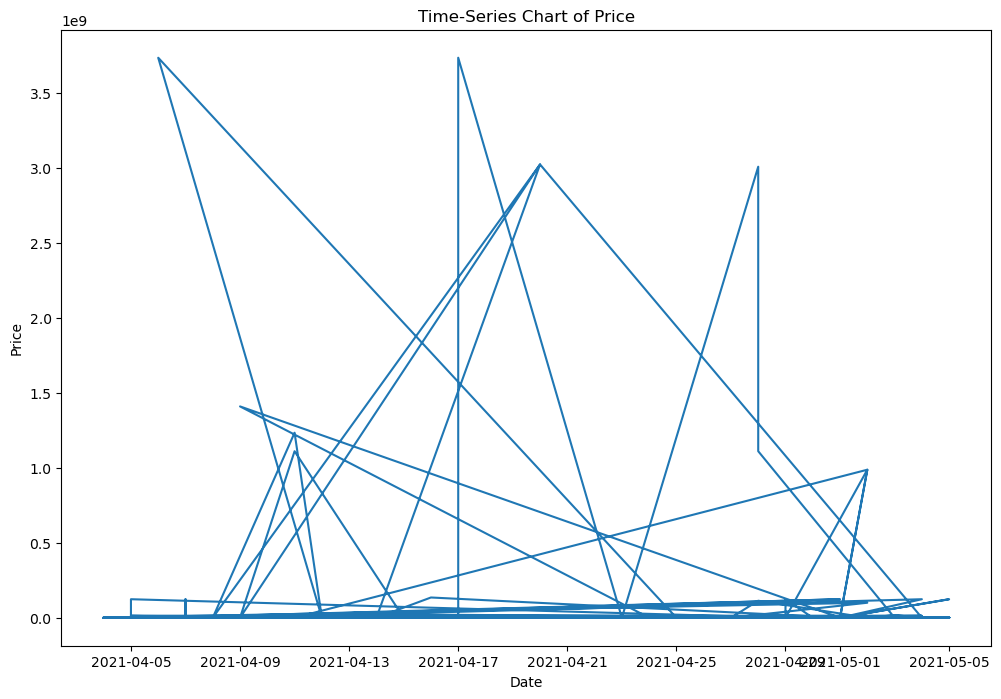

In [21]:
# Create a time-series chart
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['price'])
plt.title('Time-Series Chart of Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()